# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time,\
pickup location,drop location and no. of passengers. 

Dataset Link: [new york city taxi fare prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)

## Dataset Description
**File descriptions**
* **train.csv** - Input features and target fare_amount values for the training set (about 55M rows).
* **test.csv**- Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.
* **sample_submission.csv** - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.
### Data fields
#### ID
* **key** - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field.
Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.
#### Features
* **pickup_datetime** - timestamp value indicating when the taxi ride started.
* **pickup_longitude** - float for longitude coordinate of where the taxi ride started.
* **pickup_latitude** - float for latitude coordinate of where the taxi ride started.
* **dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.
* **dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.
* **passenger_count** - integer indicating the number of passengers in the taxi ride.
#### Target
* **fare_amount** - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

## Planning
* Approching problem with classic Machine learning algorithms
  - Random Forests
  - Xgboost
  - LGBM
  - Ridge
  - SVM 
- 
  Find best performing algorithm and hypertune it
* Approching problem using Deep learning
  * ANN (hypertune)

Imports required libs/modules

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import random

## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas


Dataset link:  [new york city taxi fare prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview)

### Download Data from Kaggle

We'll use the [opendatasets]( https://github.com/JovianML/opendatasets) library

In [2]:
dataset_url = 'https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data'

In [3]:
od.download(dataset_url)

Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)


In [4]:
data_dir = './new-york-city-taxi-fare-prediction'

Using shell commands because python modules are very slow with large data so instead of using OS modelu,\
we are using shell commands

In [5]:
# List of files with size
!ls -lh {data_dir}

total 5,4G
-rw-r--r-- 1 root root  486 29. Dez 13:42 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K 29. Dez 13:42 sample_submission.csv
-rw-r--r-- 1 root root 960K 29. Dez 13:42 test.csv
-rw-r--r-- 1 root root 5,4G 29. Dez 13:42 train.csv


In [6]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [7]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [8]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [9]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [10]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [11]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:
* It's supervise learning problem
* total size of data 5.5GB
* number of rows in trainig set 55423856
* number of rows in test set 9914
* Target/prediction is fare_amount

### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [12]:
sample_frac = 0.01 # to sample only 1% of the data from whole dataset (~500_000)

In [13]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
# increase pandas speed we are specifing the datatypes for all features/columns
dtypes = {
    'fare_amount': 'float32',
    'pickup_datetime':'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

In [14]:
def skip_rows(row_idx):
    if row_idx == 0:
        return False

    # probability of getting true is 1%, hance we can get only 1% of data
    return random.random() > sample_frac

In [15]:
random.seed(42) # to produce same results

taxi_fare_train_df = pd.read_csv(
    data_dir + '/train.csv',
    usecols=selected_cols,
    dtype=dtypes,
    parse_dates=['pickup_datetime'],
    skiprows=skip_rows
)

### Load Test Set

For the test set, we'll simply provide the data types.

In [16]:
taxi_fare_test_df = pd.read_csv(
    data_dir + '/test.csv',
    dtype=dtypes,
    parse_dates=['pickup_datetime'],
)
taxi_fare_test_df.drop('key', axis=1, inplace=True)

In [17]:
taxi_fare_test_df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [18]:
taxi_fare_train_df = taxi_fare_train_df.dropna()

train and test dataset contains data with same year, hence we do not need to predict future data, 
if we have to predict that then we have to keeping mind during spliting training dataset into train and test/validation, we have to split dataset on the basis of date. validation dataset can only contain future data than data from training data. for example train dataset contain data from year 2009-2014 and validation dataset contain only data with date 2015.

## Preprocessing

### Creating some useful functions to reuse

In [19]:
def remove_outliers_fare_amount(df:pd.DataFrame)->pd.DataFrame:
    return df[df.fare_amount>=0]

No null or NaN values

In [20]:
def remove_outliers_passenger_count(df:pd.DataFrame) -> None:
    return df[(df['passenger_count']<= 8) \
              & (df['passenger_count']>=1)
        ]

In [21]:
def add_part_dates_time(df:pd.DataFrame, col_name:str) -> None: 
    """
    This function seperate datetime objects to seperate columns with year, month, day, weekday, hour
    and drop orignal datetime column
    """
    df[f'{col_name}_year'] = df[col_name].dt.year
    df[f'{col_name}_month'] = df[col_name].dt.month
    df[f'{col_name}_day'] = df[col_name].dt.day
    df[f'{col_name}_weekday'] = df[col_name].dt.weekday
    df[f'{col_name}_hour'] = df[col_name].dt.hour
    
    # we do not need original datetime column, so we can drop it
    df.drop(col_name, axis=1, inplace=True)


To find average rige distance, we have to calculate/convert pick and dropoff longitute and latitute to distance

Add Distance Between Pickup and Drop
We can use the haversine distance:

* https://en.wikipedia.org/wiki/Haversine_formula
* https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [22]:
def haversine_np(lon1:float, lat1:float, lon2:float, lat2:float)->float:
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [23]:
def add_distance(df:pd.DataFrame)-> None:
    df['distance_km'] = haversine_np(
        df['pickup_longitude'], 
        df['pickup_latitude'], 
        df['dropoff_longitude'], 
        df['dropoff_latitude']
        )


we can remove these outliers by keeping only NYC longitute and latitute info 

In [24]:
def remove_outliers_location(df:pd.DataFrame) -> pd.DataFrame:
    return df[
                (df['pickup_longitude'] >= -75) 
                & (df['pickup_longitude'] <= -72) 
                & (df['dropoff_longitude'] >= -75) 
                & (df['dropoff_longitude'] <= -72) 
                & (df['pickup_latitude'] >= 40) 
                & (df['pickup_latitude'] <= 42) 
                & (df['dropoff_latitude'] >=40) 
                & (df['dropoff_latitude'] <= 42)
            ]

### Remove Outliers

In [25]:
def remove_outliers(df):
    df = remove_outliers_fare_amount(df=df)
    df = remove_outliers_passenger_count(df=df)
    df = remove_outliers_location(df=df)
    return df

In [26]:
taxi_fare_train_df = remove_outliers(taxi_fare_train_df)

In [27]:
taxi_fare_train_df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
5,15.5,2014-12-08 01:00:16+00:00,-73.957672,40.717888,-73.942581,40.686398,1


## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Data Cleaning
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

## Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [28]:
from sklearn.model_selection import train_test_split

Lets take frash train set, so that 
* we can automize whole preprocessing using already created functions
* We can easily skip EDA section to save time

Before we create dataset containing date and time. we have to check whether we have predict future data or past data(or random data)
we can easily check it by checking dates from testing dataset

In [29]:
taxi_fare_train_df.pickup_datetime.sample(10)

508371   2012-10-03 08:15:00+00:00
222601   2010-07-23 01:19:13+00:00
440697   2010-07-09 21:10:00+00:00
188559   2014-04-08 09:00:00+00:00
247227   2015-04-15 16:19:41+00:00
362172   2011-03-01 21:39:29+00:00
233068   2009-11-20 23:38:00+00:00
27509    2010-01-11 17:22:12+00:00
396370   2009-03-18 00:31:10+00:00
317837   2013-09-05 19:01:43+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [30]:
taxi_fare_test_df.pickup_datetime.sample(10)

4312   2009-12-29 02:06:33+00:00
5990   2015-02-14 13:15:19+00:00
9549   2011-03-06 21:01:00+00:00
4468   2015-01-12 15:36:37+00:00
3736   2010-09-15 16:44:25+00:00
9484   2011-12-13 22:00:00+00:00
8000   2009-01-03 00:51:02+00:00
3014   2010-12-09 07:29:00+00:00
4733   2015-03-17 21:44:26+00:00
3486   2009-07-14 12:12:36+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [31]:
# Separate input feature and target
X = taxi_fare_train_df.drop('fare_amount', axis=1)
y = taxi_fare_train_df.fare_amount

In [32]:
X.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
        X,y,
        test_size=0.2,
        shuffle=True, 
        random_state=42
    )

In [34]:
len(X_train), len(X_test)

(431087, 107772)

## Feature Engineering

#### Separate date and time

In [35]:
add_part_dates_time(df=X_train, col_name='pickup_datetime')
add_part_dates_time(df=X_test, col_name='pickup_datetime')

In [36]:
add_part_dates_time(df=taxi_fare_test_df, col_name='pickup_datetime')

In [37]:
X_train.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
93814,-73.969093,40.753960,-73.997871,40.754101,1,2014,10,26,6,0
489268,-73.986496,40.757961,-73.991051,40.750340,1,2012,9,18,1,22
226953,-73.953323,40.785721,-73.959900,40.778793,1,2014,9,2,1,10
320788,-73.969070,40.790936,-73.980049,40.770966,1,2011,5,27,4,8
485171,-73.991798,40.717613,-73.980392,40.716488,1,2013,2,19,1,1


#### Calculate trip distance

In [38]:
add_distance(X_train)
add_distance(X_test)
add_distance(taxi_fare_test_df) 

In [39]:
X_train.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,distance_km
93814,-73.969093,40.753960,-73.997871,40.754101,1,2014,10,26,6,0,2.422936
489268,-73.986496,40.757961,-73.991051,40.750340,1,2012,9,18,1,22,0.929820
226953,-73.953323,40.785721,-73.959900,40.778793,1,2014,9,2,1,10,0.947968
320788,-73.969070,40.790936,-73.980049,40.770966,1,2011,5,27,4,8,2.403491
485171,-73.991798,40.717613,-73.980392,40.716488,1,2013,2,19,1,1,0.968228


In [40]:
X_train.distance_km.describe()

count    431087.000000
mean          3.328954
std           3.756999
min           0.000000
25%           1.251926
50%           2.153578
75%           3.912698
max         113.474625
Name: distance_km, dtype: float64

#### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [41]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [42]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [43]:
for a_df in [X_train, X_test, taxi_fare_test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [44]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
93814,-73.969093,40.753960,-73.997871,40.754101,1,2014,10,26,6,0,2.422936,22.360109,10.729122,16.517256,4.051929,4.721626
489268,-73.986496,40.757961,-73.991051,40.750340,1,2012,9,18,1,22,0.929820,21.650261,10.284282,16.865234,3.990082,4.484262
226953,-73.953323,40.785721,-73.959900,40.778793,1,2014,9,2,1,10,0.947968,21.632538,7.231189,20.615828,0.286171,8.475368
320788,-73.969070,40.790936,-73.980049,40.770966,1,2011,5,27,4,8,2.403491,22.294411,8.948486,18.710905,1.699113,6.956115
485171,-73.991798,40.717613,-73.980392,40.716488,1,2013,2,19,1,1,0.968228,18.985872,11.193541,16.625124,7.139068,2.522616


#### Scaling and One-Hot Encoding

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.


##  Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Random Forests
- Xgboost
- LGBM
- Ridge
- SVM

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from  xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse

## Train ML Models

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

In [46]:
def evaluate(model_name, model):
    train_preds = model.predict(X_train)
    train_rmse = mse(y_train, train_preds, squared=False)

    test_preds = model.predict(X_test)
    test_rmse = mse(y_test, test_preds, squared=False)

    print(f'{model_name} --> train_rmse: {train_rmse}, test_rmse: {test_rmse}')
    return train_rmse, test_rmse, train_preds, test_preds

In [77]:
def predict_and_submit(model, fname):
    test_preds = model.predict(taxi_fare_test_df)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(f'{fname}.csv', index=None)
    return sub_df

In [75]:
model_dict = {
    'RandomForestClassifier': RandomForestRegressor(random_state=42, n_jobs=-1), 
    'Ridge':Ridge(random_state=42), 
    'lgbm':LGBMRegressor(random_state=42,n_jobs=-1), 
    'xgb':XGBRegressor(random_state=42, n_jobs=-1)
}

In [49]:
y_train.mean()

11.340904

In [70]:
model_trained_dict = {}
for model_name, model in model_dict.items():
    print(f'----------------- {model_name} --------------------')
    model.fit(X_train, y_train)
    evaluate(model_name, model)
    model_trained_dict[model_name] = model


----------------- RandomForestClassifier --------------------
RandomForestClassifier --> train_rmse: 1.4787618386778112, test_rmse: 3.747893212339698
----------------- Ridge --------------------
Ridge --> train_rmse: 5.127312173832149, test_rmse: 4.908985664627795
----------------- lgbm --------------------
lgbm --> train_rmse: 3.6979076619228404, test_rmse: 3.7166580583851494
----------------- xgb --------------------
xgb --> train_rmse: 3.113072395324707, test_rmse: 3.6840713024139404


lgbm is winner with min test_rmse 3.71665. so let's submit first result and find out the score

In [51]:
predict_and_submit(model_trained_dict['lgbm'], 'lgbmr_submission')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.983337
1,2015-01-27 13:08:24.0000003,10.857002
2,2011-10-08 11:53:44.0000002,4.800064
3,2012-12-01 21:12:12.0000002,8.334643
4,2012-12-01 21:12:12.0000003,15.724214
...,...,...
9909,2015-05-10 12:37:51.0000002,8.774939
9910,2015-01-12 17:05:51.0000001,11.836227
9911,2015-04-19 20:44:15.0000001,54.879064
9912,2015-01-31 01:05:19.0000005,20.306640


So the default lgbm model score is \
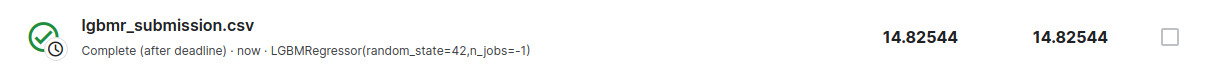

It gives us a starting point. now we have to keep beat the score

In [52]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_drid = {
    'n_estimators':np.arange(100, 1000, 100),
    'boosting_type' : ['gbdt'],
    'max_depth':[-1],
    'num_leaves':np.arange(2,50,5)
}

In [64]:
param_drid

{'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
 'boosting_type': ['gbdt'],
 'max_depth': [-1],
 'num_leaves': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])}

In [65]:
lgbm_model = LGBMRegressor(
    random_state=42,
    n_jobs=-1
)

In [66]:
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_drid,
    scoring='neg_root_mean_squared_error',
    verbose=10,
    cv=3
)

In [67]:
grid_search_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3; 1/90] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 1/3; 1/90] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=-4.759 total time=   0.4s
[CV 2/3; 1/90] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 2/3; 1/90] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=-4.596 total time=   0.5s
[CV 3/3; 1/90] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 3/3; 1/90] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=-4.509 total time=   0.5s
[CV 1/3; 2/90] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=7
[CV 1/3; 2/90] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=7;, score=-4.249 total time=   0.3s
[CV 2/3; 2/90] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=7
[CV 2/3; 2/90] END boosting_type=gbd

GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=42),
             param_grid={'boosting_type': ['gbdt'], 'max_depth': [-1],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'num_leaves': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='neg_root_mean_squared_error', verbose=10)

In [68]:
grid_search_lgbm.best_estimator_
#LGBMRegressor(n_estimators=700, num_leaves=27, random_state=42)

LGBMRegressor(n_estimators=700, num_leaves=27, random_state=42)

In [69]:
grid_search_lgbm.best_score_

-3.848868756204176

In [79]:
grid_search_lgbm.best_params_

{'boosting_type': 'gbdt',
 'max_depth': -1,
 'n_estimators': 700,
 'num_leaves': 27}

In [71]:
tune_model = grid_search_lgbm.best_estimator_
evaluate('lgbm', tune_model)

lgbm --> train_rmse: 3.1221506103242924, test_rmse: 3.639366110133532


(3.1221506103242924,
 3.639366110133532,
 array([10.42069128,  5.93269436,  5.31974239, ...,  7.14977509,
        33.67384404,  5.41967264]),
 array([17.63562609,  8.8917643 ,  6.68788389, ..., 12.84971777,
         8.50653121,  8.34660849]))

Lets submit new test predictions and get the score

In [78]:
predict_and_submit(tune_model, 'gridcv1_tune_lgbm_model')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.302076
1,2015-01-27 13:08:24.0000003,11.370283
2,2011-10-08 11:53:44.0000002,4.840505
3,2012-12-01 21:12:12.0000002,8.686417
4,2012-12-01 21:12:12.0000003,16.089029
...,...,...
9909,2015-05-10 12:37:51.0000002,8.875323
9910,2015-01-12 17:05:51.0000001,11.958994
9911,2015-04-19 20:44:15.0000001,54.977496
9912,2015-01-31 01:05:19.0000005,19.777363


This model gives me following score 
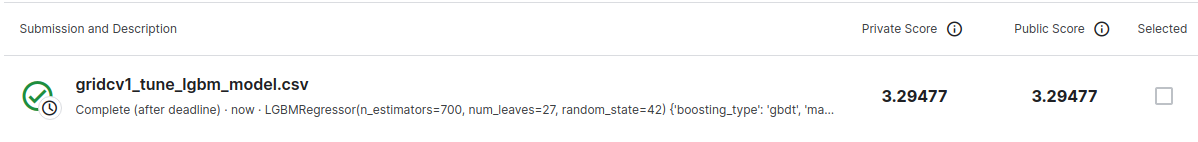

## Lets Try with ANN

## References
* https://www.kaggle.com/code/madhurisivalenka/cleansing-eda-modelling-lgbm-xgboost-starters
* https://www.kaggle.com/code/breemen/nyc-taxi-fare-data-exploration
* https://www.openstreetmap.org/export#map=10/41.1528/-73.6496
* https://www.kaggle.com/code/yekahaaagayeham/new-york-city-taxi-fare-prediction-eda-baseline#2.-Explore-the-Dataset
* https://jovian.ai/aakashns/nyc-taxi-fare-prediction-filled#C162